# Compare Exponent to Other

Here we compare exponent estimations to other methods.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

from neurodsp.sim import sim_combined
from neurodsp.utils import set_random_seed

from bootstrap import bootstrap_corr

In [2]:
# Import custom code
import sys; from pathlib import Path
sys.path.append(str(Path('..').resolve()))

from apm.run import run_comparisons
from apm.plts import plot_dots
from apm.utils import format_corr, sampler

from apm.methods import specparam_wrapper, higuchi_fd
from apm.methods import hurst_wrapper, dfa_wrapper
from apm.methods import (hjorth_activity_wrapper, hjorth_mobility_wrapper,
                         hjorth_complexity_wrapper, lempelziv_wrapper)
from apm.methods import sample_entropy, perm_entropy, app_entropy, spectral_entropy
from apm.methods.settings import HURST_PARAMS, DFA_PARAMS
from apm.methods.settings import AP_ENT_PARAMS, SA_ENT_PARAMS, PE_ENT_PARAMS, SP_ENT_PARAMS

from apm.sim.settings import FS, SIM_PARAMS_COMB

## Settings

In [3]:
# Define settings
f_range = [1, 50]
specparam_kwargs = {'min_peak_height' : 0.05, 'fs' : FS, 'f_range' : f_range}

In [4]:
# Set the random seed
set_random_seed(111)

In [5]:
# Notebook settings
SAVE_FIG = False

## Collect Methods

In [6]:
# Define ranges to sample parameters from
samplers = {'update_comb_exp' : sampler(np.arange(-2.5, 0.1, 0.1)),
            'update_pow' : sampler(np.arange(0, 1, 0.1)),
            'update_freq' : sampler(np.arange(5, 35, 1))}

In [7]:
# Define measures to apply
measures = {specparam_wrapper : specparam_kwargs,
            hurst_wrapper : HURST_PARAMS,
            dfa_wrapper : DFA_PARAMS,
            hjorth_complexity_wrapper : {}, 
            lempelziv_wrapper : {},
            higuchi_fd : {},
            app_entropy : AP_ENT_PARAMS,
            perm_entropy : PE_ENT_PARAMS,
            sample_entropy : SA_ENT_PARAMS,
            spectral_entropy : SP_ENT_PARAMS}

## Run Simulations

In [8]:
N_SIMS = 100

In [9]:
# Run simulations
outputs = run_comparisons(sim_combined, SIM_PARAMS_COMB, measures, samplers, n_sims=N_SIMS)
exp, hst, dfa, hjo, lzc, hfd, appr, perm, samp, spct = outputs

## Exponent to Fluctuations

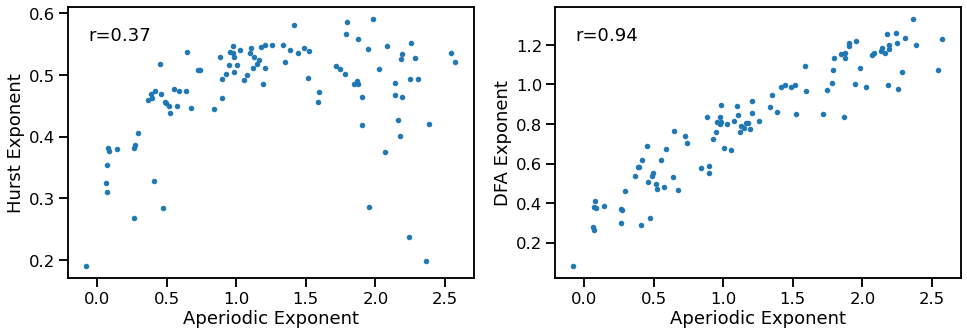

In [10]:
# Plot comparisons
_, axes = plt.subplots(1, 2, figsize=[16, 5])
plot_dots(exp, hst, ax=axes[0], tposition='tl',
          xlabel='Aperiodic Exponent', ylabel='Hurst Exponent')
plot_dots(exp, dfa, ax=axes[1], tposition='tl',
          xlabel='Aperiodic Exponent', ylabel='DFA Exponent')

In [11]:
# Compute bootstrapped correlations
corrs_hst = bootstrap_corr(exp, hst)
corrs_dfa = bootstrap_corr(exp, dfa)

In [12]:
print('Correlations:')
print('  EXP & HST:  ', format_corr(*corrs_hst))
print('  EXP & DFA:  ', format_corr(*corrs_dfa))

Correlations:
  EXP & HST:   r=+0.366  CI[+0.146, +0.559],  p=0.000
  EXP & DFA:   r=+0.945  CI[+0.914, +0.960],  p=0.000


## Exponent to Complexity

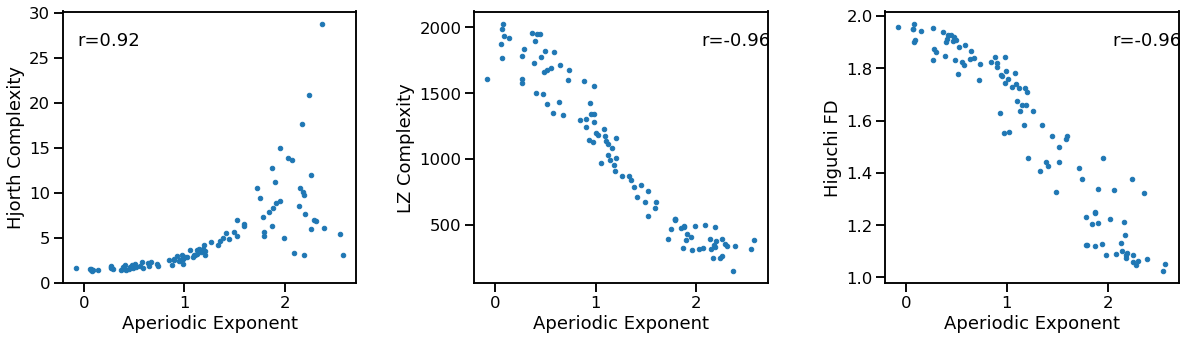

In [13]:
# Plot comparisons
_, axes = plt.subplots(1, 3, figsize=[20, 5])
plot_dots(exp, hjo, ax=axes[0], tposition='tl',
          xlabel='Aperiodic Exponent', ylabel='Hjorth Complexity')
plot_dots(exp, lzc, ax=axes[1],
          xlabel='Aperiodic Exponent', ylabel='LZ Complexity')
plot_dots(exp, hfd, ax=axes[2],
          xlabel='Aperiodic Exponent', ylabel='Higuchi FD')
plt.subplots_adjust(wspace=0.4)

In [14]:
# Compute bootstrapped correlations
corrs_hjo = bootstrap_corr(exp, hjo)
corrs_lzc = bootstrap_corr(exp, lzc)
corrs_hfd = bootstrap_corr(exp, hfd)

In [15]:
print('Correlations:')
print('  EXP & HJO:  ', format_corr(*corrs_hjo))
print('  EXP & LZC:  ', format_corr(*corrs_lzc))
print('  EXP & HFD:  ', format_corr(*corrs_hfd))

Correlations:
  EXP & HJO:   r=+0.916  CI[+0.845, +0.956],  p=0.000
  EXP & LZC:   r=-0.963  CI[-0.974, -0.938],  p=0.000
  EXP & HFD:   r=-0.961  CI[-0.972, -0.938],  p=0.000


## Exponent to Entropy

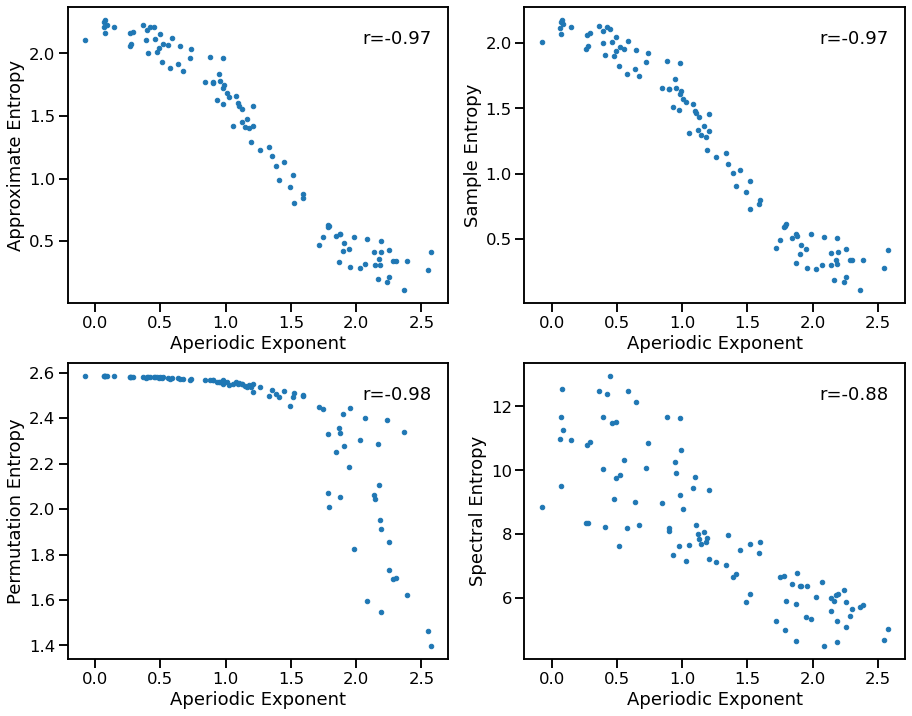

In [16]:
# Plot comparisons
_, axes = plt.subplots(2, 2, figsize=[15, 12])
plot_dots(exp, appr, ax=axes[0, 0],
          xlabel='Aperiodic Exponent', ylabel='Approximate Entropy')
plot_dots(exp, perm, ax=axes[1, 0],
          xlabel='Aperiodic Exponent', ylabel='Permutation Entropy')
plot_dots(exp, samp, ax=axes[0, 1],
          xlabel='Aperiodic Exponent', ylabel='Sample Entropy')
plot_dots(exp, spct, ax=axes[1, 1],
          xlabel='Aperiodic Exponent', ylabel='Spectral Entropy')

In [17]:
# Compute bootstrapped correlations
corrs_appr = bootstrap_corr(exp, appr)
corrs_perm = bootstrap_corr(exp, perm)
corrs_samp = bootstrap_corr(exp, samp)
corrs_spct = bootstrap_corr(exp, spct)

In [18]:
print('Correlations:')
print('  EXP & APPR:  ', format_corr(*corrs_appr))
print('  EXP & PERM:  ', format_corr(*corrs_perm))
print('  EXP & SAMP:  ', format_corr(*corrs_samp))
print('  EXP & SPCT:  ', format_corr(*corrs_spct))

Correlations:
  EXP & APPR:   r=-0.975  CI[-0.983, -0.956],  p=0.000
  EXP & PERM:   r=-0.981  CI[-0.989, -0.960],  p=0.000
  EXP & SAMP:   r=-0.973  CI[-0.982, -0.953],  p=0.000
  EXP & SPCT:   r=-0.884  CI[-0.913, -0.828],  p=0.000


## Conclusions

Words, words, words.